# Abstract

In this notebook, we make data treatment of TA without fluoresence correction

In [26]:
cd /Users/nishithmaity/Desktop/Python_code/PythonLib

/Users/nishithmaity/Desktop/Python_code/PythonLib


# Treatment of time-resolved spectroscopic data

First we will create dataframe from our time-resolved dataset

In [27]:
# Initial imports

import pandas as pd
import numpy as np
import basictools as bt
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from scipy import signal
from importlib import reload
from functools import reduce
%matplotlib inline
#%pylab inline
%reload_ext autoreload
import json
from os import listdir
from os.path import isfile, join
from IPython.display import HTML
HTML("<style>.container { width:95% !important; }</style>")

## Retrive experimental dataset and build time indexed matrix

In [28]:
# Define the path to data
path = '/Users/nishithmaity/Desktop/mercredi 08 fevrier 11h34/'
path1 = path + 'rapport des moyennes.dat'
path2 = path + 'l fixe-retard variable.dat'

# Load data and build index
delay = bt.read_data_with_inf2(path2)[0]
data = bt.read_data_with_inf2(path1).set_index(0)
data = data.replace(inf, nan).replace(-inf, nan)
data.columns = delay
data.columns.names = ['Delay']
data.index.names = ['Wavelength']
data[data.columns[[1,2,3,4,5,6,7,8,9,10,13,14,15,19,20]]].head()

Delay,-0.100,-0.100,-0.090,-0.080,-0.070,-0.060,-0.050,-0.040,-0.030,-0.020,-0.010,0.005,0.010,0.015,0.035,0.040
Wavelength,,,,,,,,,,,,,,,,
212.885329,-0.931579,0.349335,0.938343,-0.360616,1.079181,0.265314,0.578579,0.778151,-0.941954,-0.191886,-0.067826,0.498146,0.101296,NaN,-1.630428,-0.428323
213.449792,0.488370,-0.980297,-0.583239,-0.745270,-0.065899,1.582631,-0.479621,-0.413549,0.747831,0.037466,0.287064,-0.096910,-0.101550,1.347955,0.138303,-0.243991
214.014239,0.527970,-0.745162,1.028681,-0.494706,0.611759,-0.451416,0.605820,-0.490485,0.896785,-0.828716,NaN,-0.538871,-0.661038,0.458638,0.183249,-0.512370
214.578669,0.197725,-0.688685,0.715360,-0.192936,-0.507902,-0.416921,-0.719693,0.043368,-0.204016,1.038302,NaN,-0.180257,0.881138,0.062100,-1.061307,0.773072
215.143083,0.204120,0.343806,1.169966,0.094030,-0.735017,-0.103464,0.564271,-1.288796,-0.579784,-0.257396,NaN,-0.513333,-1.118099,0.027274,NaN,0.210853


(350.0, 700.0)

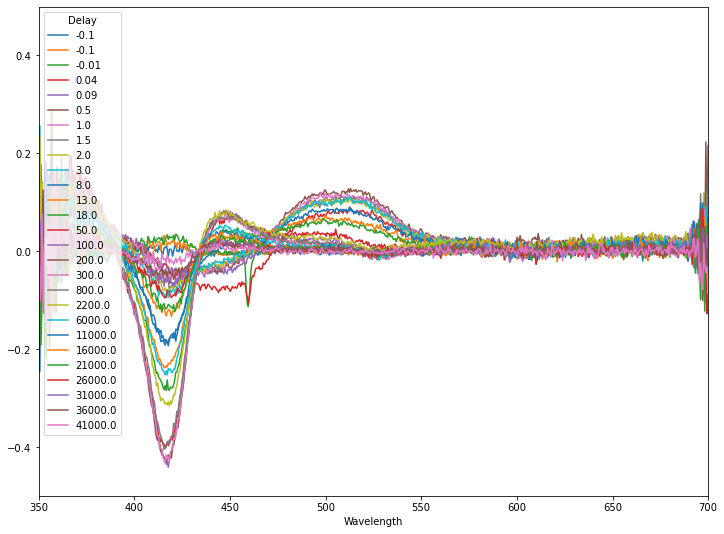

In [29]:
#t_list = [0.005, 0.01, 0.02, 0.04, 0.05, 0.06, 0.08, 1]
#t_list = [ 200.01, 200.21,200.31]
t_list = data.columns[::10]
f = figure(figsize=(12, 9))
ax =  f.add_subplot(111)
data[t_list].plot(ax=ax)
ylim(-0.5,0.5)
xlim(350,700)

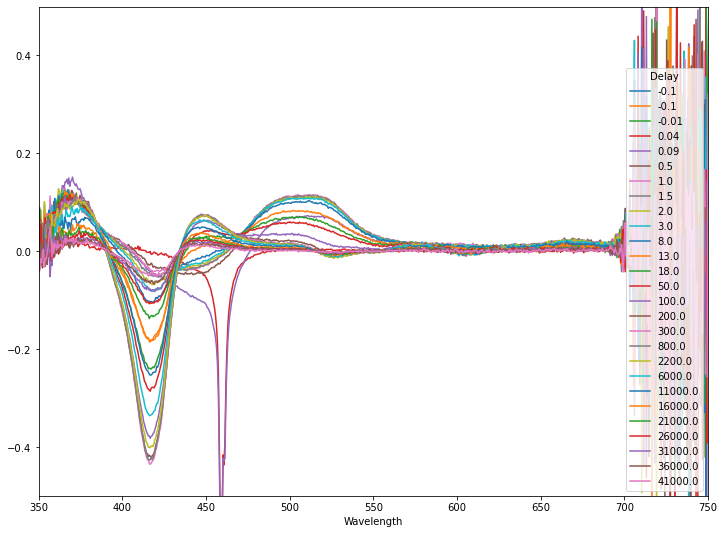

In [30]:
#Average the spectra for better signal to noise ration-this is only for visualization
avg_data = data.rolling(11,axis=1).mean().shift(5,axis=1)
#t_list = [0.005, 0.01, 0.02, 0.04, 0.05, 0.06, 0.08, 1]
#t_list = [ 200, 300, 500, 700, 1000, 3000, 5000]
#t_list = [ 200.01, 200.21,200.31]
t_list = data.columns[::10]
f = figure(figsize=(12, 9))
ax =  f.add_subplot(111)
avg_data[t_list].plot(ax=ax)
ylim(-0.5,0.5)
xlim(350,750)
avg_data.to_csv(path+'mean10pt.dat')

## Treatment of kinetic data with averaging over a window

In [31]:
#data.columns

In [32]:
import stats as st
import fitting as ft
wanted_data = st.all_average_over_filter(data, 360, 1, 5)
wanted_data = wanted_data.sort_index()

In [33]:
wanted_data.to_csv(path + 'decay.dat')

(-0.1, 40000.0)

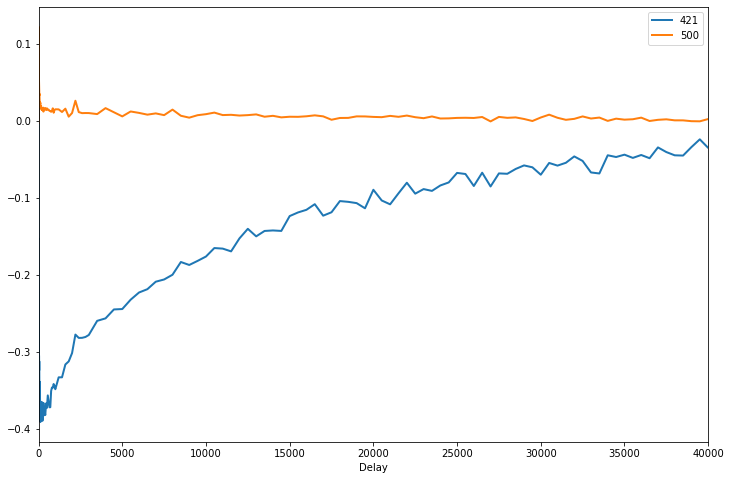

In [34]:
fig = figure(figsize=(12, 8))
ax = fig.add_subplot(111)
wanted_data[[421.0, 500.0]].plot(ax=ax, linewidth=2)
#wanted_data[[437.0]].plot(ax=ax, linewidth=2)
#ylim(-0.01,0.01)
xlim(-0.1,40000)


# Single fit of kinetics at a particular wavelength

In [35]:
reload(ft)
#Fit 3 timescale
t_init = [0.01, 50]

x0 = 0.05
xe =1000

coeff_init = 0.01
wave_length =450
spec_data = wanted_data.copy()  
test_data = spec_data[wave_length]
my_single_fit = ft.SingleCurveFit(test_data, t_init, coeff_init, x0, xe)
my_single_fit.run_fit()

/Users/nishithmaity/Desktop/Python_code/PythonLib/fitting/exp_decay_fit.py:227: RuntimeWarning: overflow encountered in exp
  return a1 * np.exp(-(x - x0) / t1) + a2 * np.exp(- (x - x0) / t2) + c


In [36]:
my_single_fit._params_fit

,Params,Errors
a1,-0.029611,0.002163
a2,-0.102399,0.000647
t1,0.031806,0.004408
t2,14.790354,0.278314
c,0.070423,0.000436
chi2,0.001174,NaN


Here, we plot the raw data and the fitted data

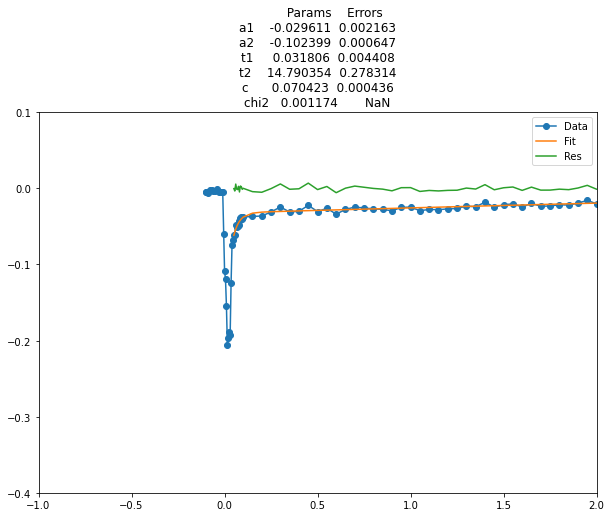

In [37]:
#plotting fitted kinetics

f = figure(figsize=(10, 7))
ax = f.add_subplot(111)
my_single_fit._all_data.plot(ax=ax, title=str(my_single_fit._params_fit),style=['-o','-','-'])
xlim(-1,2);
ylim(-0.4,0.1);

In [38]:
#Save the fitted data
import os
save_dir = 'Fit/'
save_file = 'single_decays_1_' + str(wave_length) + '.dat'
my_single_fit.save_data(path, save_dir, save_file)
save_params = 'single_params_fit_1_' + str(wave_length) + '.dat'
my_single_fit.save_params(path, save_dir, save_params)

# Global fit of the complete kinetics dataset

Build our global fit algorithm using Scipy package

In [39]:
reload(ft.my_global_fit)
reload(ft)

<module 'fitting' from '/Users/nishithmaity/Desktop/Python_code/PythonLib/fitting/__init__.py'>

In [54]:
# Define timescale and coeff
t_init = [0.01, 30, 2000]
#t_init = [0.77]
coeff_init = 0.01
# Prepare data
xbegin = 0.05
xend = 40000
lbd_list = [400.0, 410.0, 526.0, 701.0]
#lbd_list = [355, 562]
#lbd_list = [346,  406, 436, 475, 491, 554, 574, 585, 715, 1048]
test_data = spec_data.loc[xbegin:xend][lbd_list].T.dropna().T
my_global_fit = ft.MyGlobalFit(test_data, t_init, coeff_init, xbegin, xend, use_norm=True)
my_global_fit.run_global_fit()

/Users/nishithmaity/Desktop/Python_code/PythonLib/fitting/my_global_fit.py:108: RuntimeWarning: overflow encountered in exp
  res += a_dict[k] * np.exp(-(x - x0) / t_dict[k])
/Users/nishithmaity/Desktop/Python_code/PythonLib/fitting/my_global_fit.py:108: RuntimeWarning: overflow encountered in exp
  res += a_dict[k] * np.exp(-(x - x0) / t_dict[k])


(-5.0, 40.0)

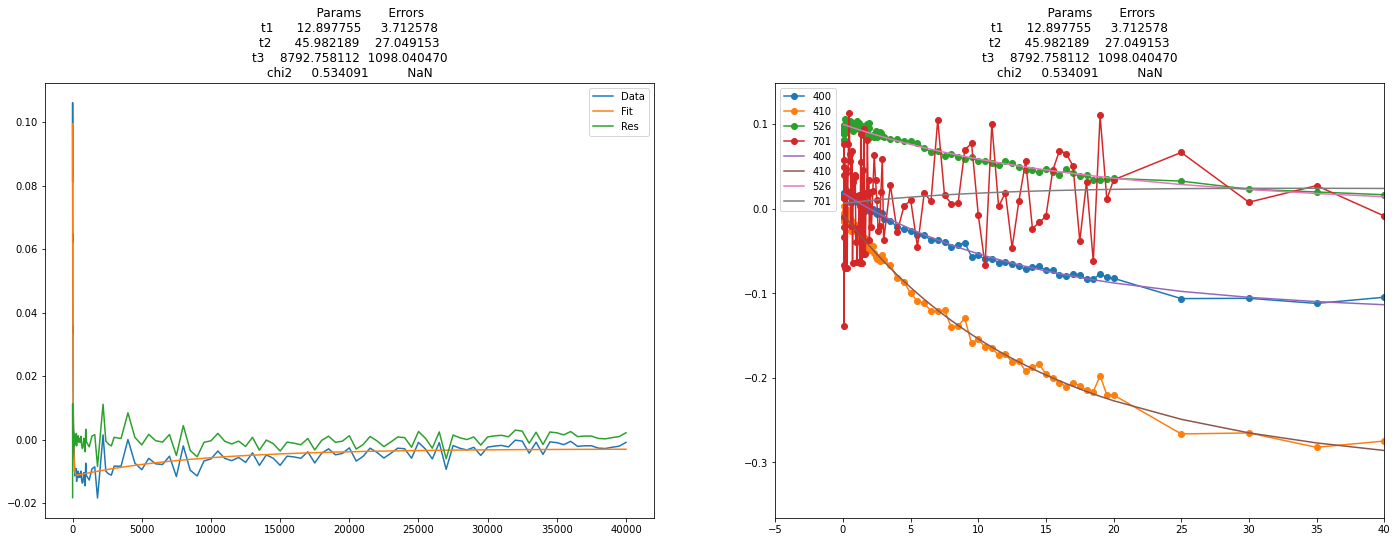

In [55]:
f = figure(figsize=(24, 8))
ax = f.add_subplot(121)
my_global_fit._all_data.xs(526, axis=1, level=1).plot(title=str(my_global_fit.report_ts), ax=ax)
ax = f.add_subplot(122)
my_global_fit._all_data.Data.plot(title=str(my_global_fit.report_ts), ax=ax, style='o-')
my_global_fit._all_data.Fit.plot(title=str(my_global_fit.report_ts), ax=ax)
xlim(-5,40)

In [56]:
my_global_fit.report_coeff

400                 410                 701                 526  \
      Params    Errors    Params    Errors    Params    Errors    Params   
a1  0.124822  0.036067  0.243663  0.084698 -0.027964  0.014575  0.055839   
a2  0.022169  0.037996  0.081192  0.086765  0.015628  0.014546  0.055192   
a3 -0.113341  0.005750 -0.288625  0.014396  0.011455  0.005604 -0.008627   
c  -0.015612  0.004421 -0.043611  0.011156  0.007301  0.003366 -0.002933   

              
      Errors  
a1  0.032834  
a2  0.031420  
a3  0.004627  
c   0.002591

In [57]:
my_global_fit.report_ts

,Params,Errors
t1,12.897755,3.712578
t2,45.982189,27.049153
t3,8792.758112,1098.040470
chi2,0.534091,NaN


In [58]:

my_global_fit.save_timescale(path, 'Fit')

## Fit all wavelength

In [59]:
#reload(ft.exp_decay_fit)
reload(ft)
list_ts = my_global_fit._time_scale['Params'].values
#list_ts = [12, 105, 470]
ind_spec_data = wanted_data[~wanted_data.index.duplicated()].T.dropna().T
list_lambda = list(ind_spec_data.columns)
my_all_coeff_fit = ft.FitAllCoeff(ind_spec_data, list_lambda, list_ts, xbegin, xend)
my_all_coeff_fit.run_fit()

(-0.5, 3.0)

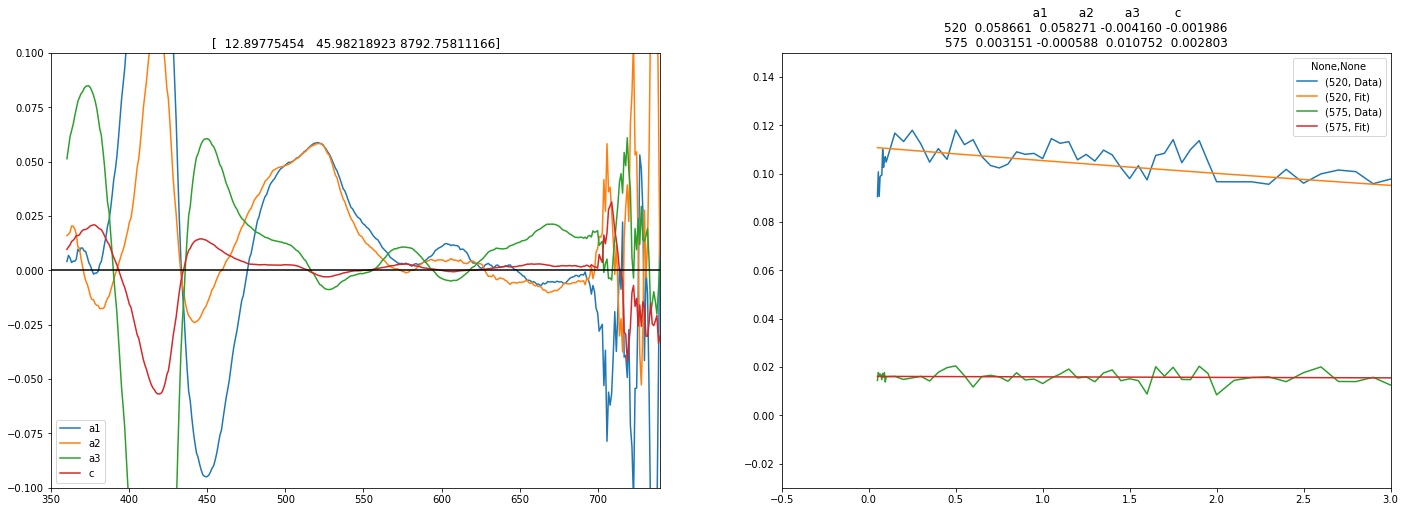

In [60]:
f = figure(figsize=(24, 8))
ax = f.add_subplot(121)
abs_spectra = my_all_coeff_fit._coeffs_fit.T.iloc[:]
abs_spectra.plot(ax=ax, style='-', title=str(list_ts))
#ax.axvline(460, color='k')
#ax.axvline(620, color='k')
ax.axhline(0, color='k')
ylim(-0.1, 0.1)
xlim(350, 740)
ax = f.add_subplot(122)
lbd = [520,575]
my_all_coeff_fit._all_data[lbd].dropna().plot(ax=ax, title=str(abs_spectra.loc[lbd]))
ylim(-0.03, 0.15)
xlim(-0.5, 3)

In [61]:
#save data
save_dir = 'Fit/'
save_file = 'global_fit_3decay.dat'
save_params = 'params_fit_3decay.dat'
my_all_coeff_fit.save_data(path, save_dir, save_file)
my_all_coeff_fit.save_coeffs_fit(path, save_dir, save_params)

In [25]:
#my_all_coeff_fit._chi2

# Conclusion

In this jupyter notebook, we show all the different ways to fit the experimental time-resolved dataset using target and global analysis. 